**Fully cleaning the dataset**

**Importing data**


In [80]:
# imports
from IPython.display import clear_output
from PIL import Image
import os
import json
# clear
clear_output(wait=True)
# installing kaggle
!pip install -q kaggle
# user and key info
info = {"username":"jackbellamy","key":"3442898ba5e904ac3a48eb5b59398805"}
# opening file
json_object = json.dumps(info, indent=4)
with open("kaggle.json", "w") as outfile:
    outfile.write(json_object)
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# copying data to content file of kaggle which can be found on the left hand side of the screen
if not (os.path.exists("/content/nfl-big-data-bowl-2022")):
  !kaggle competitions download -c nfl-big-data-bowl-2022
  !mkdir nfl-big-data-bowl-2022
  !unzip nfl-big-data-bowl-2022.zip -d nfl-big-data-bowl-2022

mkdir: /Users/emiljino/.kaggle: File exists
nfl-big-data-bowl-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: nfl-big-data-bowl-2022: File exists
Archive:  nfl-big-data-bowl-2022.zip
replace nfl-big-data-bowl-2022/PFFScoutingData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
**Serialisation**

In [81]:
import pandas as pd
# reading the data to variables
scouting = pd.read_csv("nfl-big-data-bowl-2022/PFFScoutingData.csv")
games = pd.read_csv("nfl-big-data-bowl-2022/games.csv")
players = pd.read_csv("nfl-big-data-bowl-2022/players.csv")
plays = pd.read_csv("nfl-big-data-bowl-2022/plays.csv")
tracking2018 = pd.read_csv("nfl-big-data-bowl-2022/tracking2018.csv")
tracking2019 = pd.read_csv("nfl-big-data-bowl-2022/tracking2019.csv")
tracking2020 = pd.read_csv("nfl-big-data-bowl-2022/tracking2020.csv")

**Generalised cleaning functions**

**Abbreviations to full names**

In [82]:
def abbrvs(csv,column,abbrv,fullname):
  # new names
  type_name = []
  # looping through
  for i in csv[column]:
    # filtering out NaN values
    if i in abbrv:
      index = abbrv.index(i)
      type_name.append(fullname[index])
    else:
      type_name.append(i)
  return type_name

**Team and number splitting**

In [83]:
def team_number_splitting(csv,column,symbol):
  # splitting to team and number
  split_team = []
  split_numbers = []
  # splitting the data
  split = csv[column].str.split(symbol, expand = True)
  # loop for each
  for i in range(0,len(csv)):
    # specific data
    split.iloc[i]
    # number of NaN
    nan_num = split.iloc[i].isna().sum()
    max = len(split.iloc[i])
    if max-nan_num == 0:
      split_team.append(csv[column][i])
      split_numbers.append(csv[column][i])
    else:
      info = []
      for j in range(0,(max-nan_num)):
        split_i = split[j][i].split(" ")
        info.append(split_i)
      # team name
      split_team.append(info[0][0])
      # numbers
      nums = []
      for k in range(0,max-nan_num):
        num = info[k][1]
        nums.append(num)
      split_numbers.append(nums)
  return split_team,split_numbers

**Number splitting**

In [84]:
def number_splitting(csv,column,symbol,n):
  split = csv[column].str.split(symbol, n = n, expand = True)
  return split

**Pandas to number**

In [85]:

def pd_to_num(csv,split,column_names):
  split.columns = column_names
  # adding columns
  for name in column_names:
    csv[name] = pd.to_numeric(split[name])
  return

**Scouting** 


In [86]:
# before
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [87]:
# abbreviations: 'kickType', 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'
# team number splitting: 'missedTackler', 'specialTeamsSafeties', 'Vises'
# number splitting: 'kickoffReturnFormation'

In [88]:
# abbreviations
# 'kickType'
csv = scouting
column = "kickType"
kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']
kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']
# calling function
kick_type_fullnames = abbrvs(csv,column,kick_types,kick_type_names)
# adding column
scouting["kick_type_name"] = kick_type_fullnames

# 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'

In [89]:
# team and numbers
# 'missedTackler'
csv = scouting

column = "missedTackler"
symbol = "; "
# calling function
missed_tackler_team, missed_tackler_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["missed_tackler_team"] = missed_tackler_team
scouting["missed_tackler_numbers"] = missed_tackler_numbers

# 'specialTeamsSafeties'
column = "specialTeamsSafeties"
symbol = "; "
# calling function
specialTeamsSafeties_team, specialTeamsSafeties_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["special_teams_safeties_team"] = specialTeamsSafeties_team
scouting["special_teams_safeties_numbers"] = specialTeamsSafeties_numbers

# 'Vises'
column = "vises"
symbol = "; "
# calling function
vises_team, vises_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["vises_team"] = vises_team
scouting["vises_numbers"] = vises_numbers

In [90]:
# number splitting
# 'kickoffReturnFormation'
csv = scouting
column = "kickoffReturnFormation"
symbol = "-"
n = 2
column_names = ['formation_front','formation_mid','formation_back']
# calling function
formation_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,formation_split,column_names)

In [91]:
# after
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,...,kick_type_name,missed_tackler_team,missed_tackler_numbers,special_teams_safeties_team,special_teams_safeties_numbers,vises_team,vises_numbers,formation_front,formation_mid,formation_back
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,...,Deep,NaN,NaN,PHI,"[23, 27]",NaN,NaN,8.0,0.0,2.0
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,...,Normal,PHI,[57],NaN,NaN,ATL,"[83, 27, 34, 21]",NaN,NaN,NaN
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PHI,[58],NaN,NaN,NaN,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,...,Deep,ATL,[83],ATL,"[17, 22]",NaN,NaN,8.0,0.0,2.0
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,...,Normal,NaN,NaN,ATL,[37],ATL,"[83, 34, 21]",NaN,NaN,NaN


**Games**

In [92]:
# before
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [93]:
# abbreviations: 'homeTeamAbbr' , 'visitorTeamAbbr'
# team number splitting:
# number splitting: 'gameDate', 'gameTimeEastern'

In [94]:
# abbreviations
# 'homeTeamAbbr', 'visitorTeamAbbr'

In [95]:
# number splitting
# 'gameDate'
csv = games

column = "gameDate"
symbol = "/"
n = 2
column_names = ['game_date_day','game_date_month','game_date_year']
# calling function
game_date_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_date_split,column_names)

# 'gameTimeEastern'
column = "gameTimeEastern"
symbol = ":"
n = 2
column_names = ['game_time_hour','game_time_minute','game_time_second']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [96]:
# after
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,game_date_day,game_date_month,game_date_year,game_time_hour,game_time_minute,game_time_second
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6,2018,20,20,0
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9,2018,13,0,0
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9,2018,13,0,0
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9,2018,13,0,0
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9,2018,13,0,0


**Players**

In [97]:
# before
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [98]:
# abbreviations:
# team number splitting:
# number splitting: birth
# unique one is height

In [99]:
# 'birthDate'
# splitting the numbers
players['birth_year'] = pd.DatetimeIndex(players['birthDate']).year

In [100]:
# 'height'
height_split = players["height"].str.split("-", n = 1, expand = True)
# new column names
height_split.columns = ['Feet', 'Inch']
# adding new columns
players["height_feet"] = pd.to_numeric(height_split["Feet"])
players["height_inch"] = pd.to_numeric(height_split["Inch"])
# still have 73 feet
# getting rid of NaN values
players["height_inch"] = players["height_inch"].fillna(0)
# replacing heights that did not have '-' at start
for i in players["height_feet"]:
    if i > 7:
        j = 0.0833333 * i
        players["height_feet"].replace({i : j}, inplace=True)        
# inches to numerical value
players["height_inch"] = 0.0833333 * players["height_inch"]
# adding feet and inches to get one value
height_numerical = players["height_feet"] + players["height_inch"]
# adding new numerical value column
players["height_numerical"] = pd.to_numeric(height_numerical)

In [101]:
# after
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,birth_year,height_feet,height_inch,height_numerical
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,1992.0,6.0,0.083333,6.083333
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994.0,6.0,0.000000,6.000000
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993.0,6.0,0.000000,6.000000
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992.0,6.0,0.083333,6.083333
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993.0,6.0,0.083333,6.083333


In [102]:
players.tail()

,nflId,height,weight,birthDate,collegeName,Position,displayName,birth_year,height_feet,height_inch,height_numerical
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,1986.0,6.000000,0.250000,6.250000
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,1985.0,6.000000,0.250000,6.250000
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,1993.0,5.000000,0.750000,5.750000
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,1992.0,6.083331,0.000000,6.083331
2731,42849,5-10,205,12/14/1992,Texas Tech,WR,Bradley Marquez,1992.0,5.000000,0.833333,5.833333


In [103]:
# Maximum and Minimum height of the players in feet
print("Maximum height of the player in feet : ",max(players["height_feet"]))
print("Minimum height of the player in feet : ",min(players["height_feet"]))

Maximum height of the player in feet :  6.5833307
Minimum height of the player in feet :  5.0


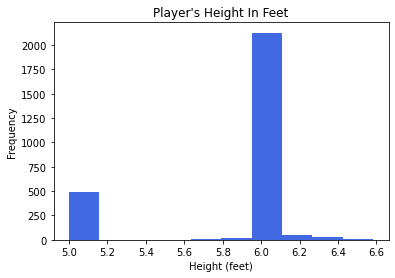

In [104]:
import matplotlib.pyplot as plt
import numpy as np
# Creating Histogram plot
#fig = plt.hist(players, x="height_feet", title="Player's Height In Feet", nbins=10, color_discrete_sequence=["royalblue"])

# Displaying Histogram plot
#fig.show()

# Create the histogram
plt.hist(players['height_feet'], bins=10, color='royalblue')

# Set the title and axis labels
plt.title("Player's Height In Feet")
plt.xlabel('Height (feet)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Plays**

In [105]:
# before
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [106]:
# abbreviations: 'possessionTeam'
# team number splitting: 'penaltyJerseyNumbers'
# number splitting: 'gameClock'

In [107]:
# abbreviations
# 'possessionTeam'

In [108]:
# team number splitting
# 'penaltyJerseyNumbers'
csv = plays

column = "penaltyJerseyNumbers"
symbol = ";"
# calling function
penaltyJerseyNumbers_team, penaltyJerseyNumbers_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["penalty_jersey_team"] = penaltyJerseyNumbers_team
scouting["penalty_jersey_numbers"] = penaltyJerseyNumbers_numbers

# broken, think it is to do with values being just team name 'BAL'

IndexError: list index out of range

In [110]:
# number splitting
# 'gameClock'
csv = plays

column = "gameClock"
symbol = ":"
n = 2
column_names = ['game_clock_minute','game_clock_second','game_clock_milli']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [111]:
# after
plays.head(10)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_clock_minute,game_clock_second,game_clock_milli
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,0,0,NaN,66.0,NaN,40,45,15,0,0
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,0,0,NaN,56.0,5.0,36,18,9,20,0
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,0,NaN,21.0,NaN,0,13,5,3,0
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,0,3,NaN,64.0,30.0,34,75,5,1,0
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,0,3,NaN,65.0,NaN,45,45,0,33,0
5,2018090600,973,"(14:18) M.Bosher punts 49 yards to PHI 40, Cen...",2,4,19,ATL,Punt,Fair Catch,37267.0,...,0,3,NaN,49.0,NaN,49,21,14,18,0
6,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,0,3,NaN,26.0,NaN,0,18,6,12,0
7,2018090600,1387,J.Elliott kicks 65 yards from PHI 35 to end zo...,2,0,0,PHI,Kickoff,Touchback,44966.0,...,3,3,NaN,72.0,NaN,40,75,6,9,0
8,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,3,3,NaN,52.0,NaN,0,76,2,13,0
9,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,...,3,6,NaN,68.0,13.0,60,45,2,8,0


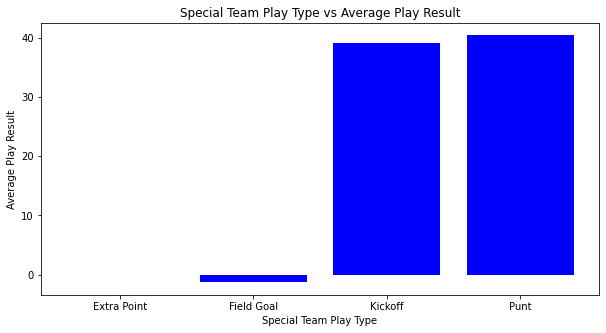

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_data = plays.groupby("specialTeamsPlayType")["playResult"].mean()

# Create a bar graph
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(grouped_data.index, grouped_data.values, color='b')
plt.xlabel("Special Team Play Type")
plt.ylabel("Average Play Result")
plt.title("Special Team Play Type vs Average Play Result")
plt.show()

**Tracking**

In [113]:
# before
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [ ]:
# it is clean

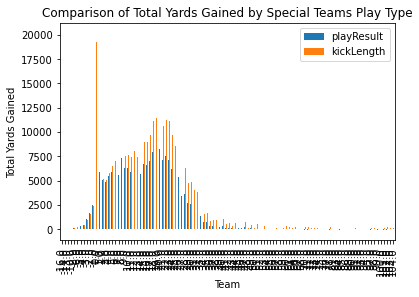

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the columns we want to compare
data = plays[['kickReturnYardage', 'playResult', 'kickLength']]

# Remove any rows with missing data
data = data.dropna()

# Group the data by team and calculate the sum of yards for each play type
grouped_data = data.groupby('kickReturnYardage').sum()

# Plot a bar chart to compare the total yards gained for each play type by each team
ax = grouped_data.plot(kind='bar')
ax.set_xlabel('Team')
ax.set_ylabel('Total Yards Gained')
ax.set_title('Comparison of Total Yards Gained by Special Teams Play Type')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

# Load the data from the CSV file
df = plays

# Identify the relevant columns
relevant_cols = ['gameId', 'specialTeamsPlayType', 'specialTeamsResult', 'playResult']

# Filter the data to include only rows where the gameId matches the specified value
gameId = 2018090600
game_data = df[df['gameId'] == gameId]

# Convert the data in the playResult column to numeric format
# game_data['playResult'] = pd.to_numeric(game_data['playResult'])

# Combine the relevant columns into a new dataframe or array
relevant_data = game_data[relevant_cols]

# Display the resulting dataframe or array
print(relevant_data)

        gameId specialTeamsPlayType    specialTeamsResult  playResult
0   2018090600              Kickoff             Touchback          40
1   2018090600                 Punt                Return          36
2   2018090600           Field Goal     Kick Attempt Good           0
3   2018090600              Kickoff                Return          34
4   2018090600                 Punt             Touchback          45
5   2018090600                 Punt            Fair Catch          49
6   2018090600           Field Goal     Kick Attempt Good           0
7   2018090600              Kickoff             Touchback          40
8   2018090600           Field Goal     Kick Attempt Good           0
9   2018090600              Kickoff                Return          60
10  2018090600                 Punt                Downed          58
11  2018090600                 Punt                Return          61
12  2018090600              Kickoff             Touchback          40
13  2018090600      

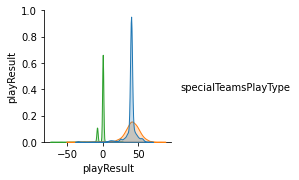

In [ ]:
import pandas as pd
import seaborn as sns

# Load the data from the CSV file
df = plays

# Filter the data to include only relevant columns
relevant_cols = ['specialTeamsPlayType', 'playResult']
df = df[relevant_cols]

#gameId = 2018090600
#game_data = df[df['gameId'] == gameId]


#relevant_data = game_data[relevant_cols]

# Create a scatter plot matrix
sns.pairplot(df, hue='specialTeamsPlayType')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.concat([scouting, games, players, plays, tracking2018], axis=0)
data = data.drop(['gameId', 'playId', 'nflId'], axis=1)
data = pd.get_dummies(data, columns=['specialTeamsPlayType', 'possessionTeam', 'specialTeamsResult'])

numerical_cols = ['x', 'y', 's', 'a', 'dis', 'o', 'dir']
data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()

# Convert dummy variables to np.float32
dummy_cols = data.columns[data.columns.str.startswith('specialTeamsPlayType_') |
                          data.columns.str.startswith('possessionTeam_') |
                          data.columns.str.startswith('specialTeamsResult_')]
data[dummy_cols] = data[dummy_cols].astype(np.float32)

X = data.drop(['yardsToGo'], axis=1)
y = data['yardsToGo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=1)

# Evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Load game data into pandas dataframe
#game_df = pd.read_csv('game_data.csv')

# Load play data into pandas dataframe
#play_df = pd.read_csv('play_data.csv')

# Load player tracking data for a specific season into pandas dataframe
#tracking_df = pd.read_csv('tracking_2022.csv')

# Load PFF scouting data into pandas dataframe
#scouting_df = pd.read_csv('pff_scouting_data.csv')

# Merge game data and play data on gameId
merged_df = pd.merge(games, plays, on='gameId')

# Merge merged_df and scouting data on gameId and playId
final_df = pd.merge(merged_df, scouting, on=['gameId', 'playId'])

# Merge final_df and tracking data on gameId and playId
final_df = pd.merge(final_df, tracking2020, on=['gameId', 'playId'])

final_df = pd.merge(final_df, players, on=['nflId'])

# Select features for the model
features = ['quarter', 'down', 'yardsToGo', 'preSnapHomeScore', 'preSnapVisitorScore', 'kickLength', 'kickReturnYardage', 'playResult', 's', 'a', 'dis', 'o', 'dir']

final_df = final_df.fillna(0)

#features = features.fillna(0)

#features.dropna()

# Encode categorical features
final_df = pd.get_dummies(final_df, columns=['homeTeamAbbr', 'visitorTeamAbbr', 'possessionTeam', 'specialTeamsPlayType', 'specialTeamsResult', 'position'])

# Split data into training and testing sets
X = final_df[features]
y = final_df['passResult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

ValueError: Unknown label type: 'unknown'

In [ ]:
print(players.columns)

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'Position',
       'displayName', 'birth_year', 'height_feet', 'height_inch',
       'height_numerical'],
      dtype='object')


/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_4212/958085577.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



TypeError: 'value' must be an instance of str or bytes, not a float

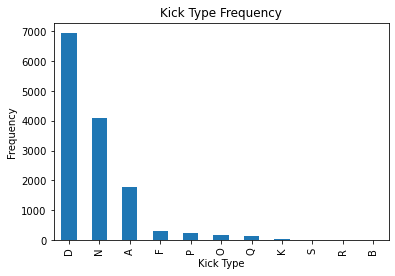

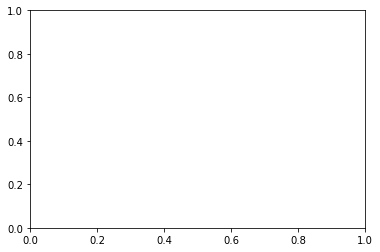

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

merged_df = pd.merge(plays, scouting, on=['gameId', 'playId'])
# Group by kick type and calculate the mean kick length and return length
kick_stats = merged_df.groupby('kickType')['kickLength', 'kickReturnYardage'].mean().reset_index()

# Plot kick type against frequency
fig, ax = plt.subplots()
merged_df['kickType'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Kick Type Frequency')
ax.set_xlabel('Kick Type')
ax.set_ylabel('Frequency')

# Plot kick length by kick type
fig, ax = plt.subplots()
ax.scatter(merged_df['kickType'], merged_df['kickLength'], alpha=0.5)
kick_mean = kick_stats['kickLength'].values
kick_type = kick_stats['kickType'].values
for i, txt in enumerate(kick_mean):
    ax.scatter(kick_type[i], txt, color='red', alpha=1)
ax.set_title('Kick Length by Kick Type')
ax.set_xlabel('Kick Type')
ax.set_ylabel('Kick Length (yards)')

# Plot return length by kick type
fig, ax = plt.subplots()
ax.scatter(merged_df['kickType'], merged_df['kickReturnYardage'], alpha=0.5)
return_mean = kick_stats['kickReturnYardage'].values
return_type = kick_stats['kickType'].values
for i, txt in enumerate(return_mean):
    ax.scatter(return_type[i], txt, color='red', alpha=1)
ax.set_title('Return Length by Kick Type')
ax.set_xlabel('Kick Type')
ax.set_ylabel('Return Length (yards)')

plt.show()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_4212/407999639.py:13: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



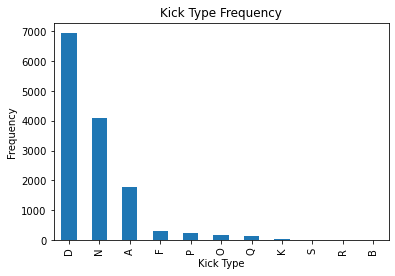

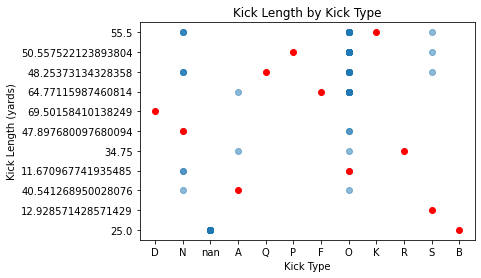

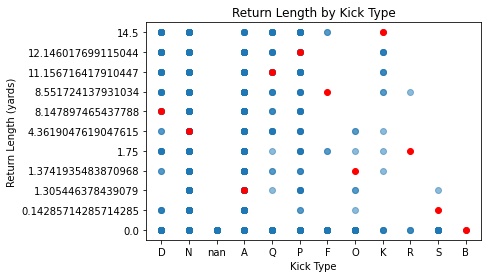

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
merged_df = pd.merge(plays, scouting, on=['gameId', 'playId'])

# Round the kickLength and kickReturnYardage columns to the nearest whole number
merged_df['kickLength'] = merged_df['kickLength'].fillna(0).round().astype(int)
merged_df['kickReturnYardage'] = merged_df['kickReturnYardage'].fillna(0).round().astype(int)


# Group by kick type and calculate the mean kick length and return length
kick_stats = merged_df.groupby('kickType')['kickLength', 'kickReturnYardage'].mean().reset_index()
kick_stats = kick_stats.sort_values(by=['kickLength'], ascending=True)
kick_stats = kick_stats.sort_values(by=['kickReturnYardage'], ascending=True)

# # Round the kickLength and kickReturnYardage columns to the nearest whole number
# merged_df['kickLength'] = merged_df['kickLength'].round().astype(int)
# merged_df['kickReturnYardage'] = merged_df['kickReturnYardage'].round().astype(int)


# Plot kick type against frequency
fig, ax = plt.subplots()
merged_df['kickType'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Kick Type Frequency')
ax.set_xlabel('Kick Type')
ax.set_ylabel('Frequency')

# Plot kick length by kick type
fig, ax = plt.subplots()
ax.scatter(merged_df['kickType'].astype(str), merged_df['kickLength'], alpha=0.5)
kick_mean = kick_stats['kickLength'].values
kick_type = kick_stats['kickType'].values
for i, txt in enumerate(kick_mean):
    ax.scatter(kick_type[i], str(txt), color='red', alpha=1)
ax.set_title('Kick Length by Kick Type')
ax.set_xlabel('Kick Type')
ax.set_ylabel('Kick Length (yards)')

# Plot return length by kick type
fig, ax = plt.subplots()
ax.scatter(merged_df['kickType'].astype(str), merged_df['kickReturnYardage'], alpha=0.5)
return_mean = kick_stats['kickReturnYardage'].values
return_type = kick_stats['kickType'].values
for i, txt in enumerate(return_mean):
    ax.scatter(return_type[i], str(txt), color='red', alpha=1)
ax.set_title('Return Length by Kick Type')
ax.set_xlabel('Kick Type')
ax.set_ylabel('Return Length (yards)')

plt.show()

**Overall, clean now except 'penaltyJerseyNumbers' and some abbrvs**